In [ ]:
#importing libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#read the friends.xlsx and clear nan values
df = pd.read_excel("friends.xlsx")
df1 = df.dropna()

In [ ]:
#making nodes of graph
listfriends = df1.values.tolist()
nodes =[]
for i in range(len(listfriends)):
    shakhs=listfriends[i]
    for j in range(len(shakhs)):
        a=shakhs[j]
        if a not in nodes and a!="nan":
            nodes.append(a)

175
239


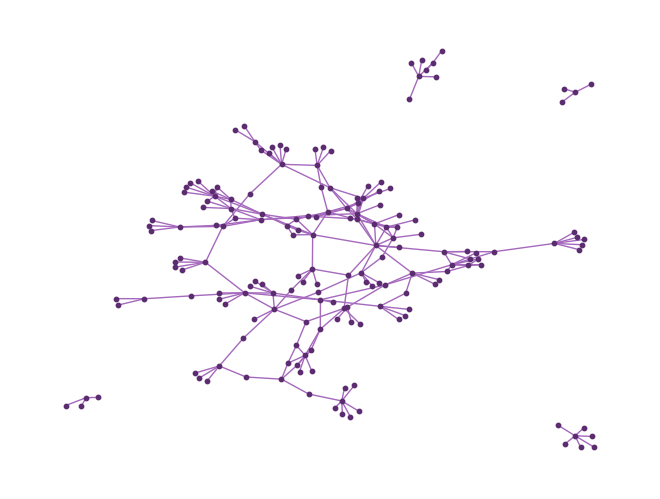

In [ ]:
# making edges of graph
g=nx.Graph()
g.add_nodes_from(nodes)
for listt in listfriends:
    y =listt[0]
    for x in listt:
        if x!=y:
            g.add_edge(x,y)

# show the graph
nx.draw(g, node_size =10, node_color='#5B2C6F', edge_color='#A569BD')

#number of nodes and edges
print(len(g))
print(g.size())


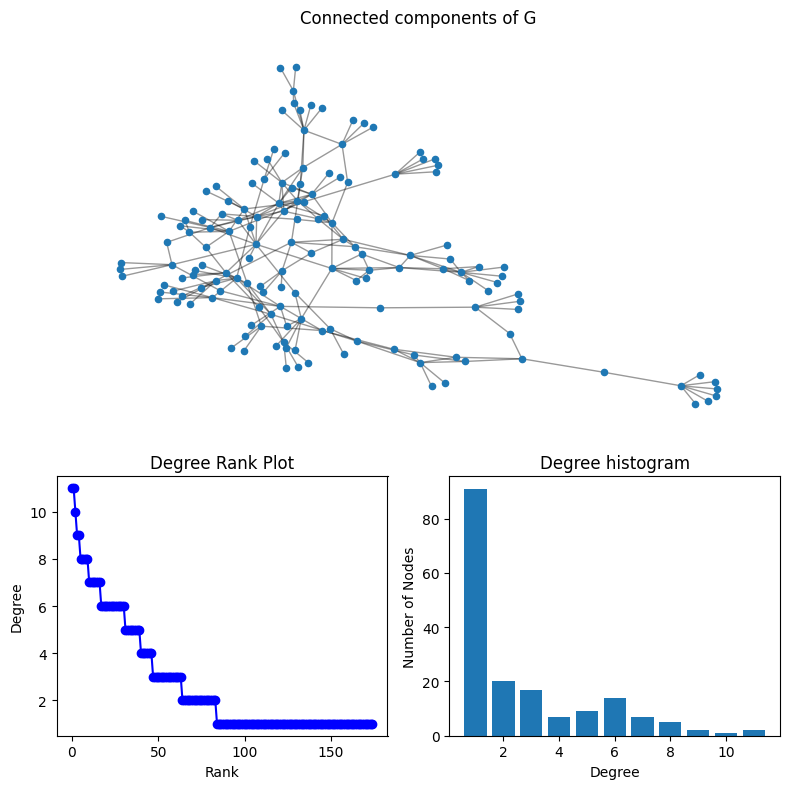

In [ ]:
#degree distribution
degree_sequence = sorted((d for n, d in g.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Number of Nodes")

fig.tight_layout()
plt.show()


In [ ]:
nx.diameter(g)

NetworkXError: Found infinite path length because the graph is not connected

In [ ]:
center =nx.degree_centrality(g)
print(sum(center.values())/len(center))

0.01569786535303774


In [ ]:
between = nx.betweenness_centrality(g, k=None, normalized=True, weight=None, endpoints=False, seed=None)
print(sum(between.values())/len(between))

0.020248108810994994


In [ ]:
r = nx.degree_assortativity_coefficient(g)
print(r)

-0.17029271244080021
-0.2


In [ ]:
communities_generator = nx.community.girvan_newman(g)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
com = sorted(map(sorted, next_level_communities))
nx.community.modularity(g, com)

0.5475481871815969

In [ ]:
print(nx.approximation.average_clustering(g, trials=1000, seed=10))


0.126


In [ ]:
print(nx.node_connectivity(g, s=None, t=None))

from networkx.algorithms import approximation as apxa

k_components = apxa.k_components(g)
#print(k_components)

print(nx.approximation.max_clique(g))
print(nx.approximation.maximum_independent_set(g))
print(nx.k_core(g, k=None, core_number=None))

nx.density(g)

node = 'هانیه حاتمی'
print(nx.non_neighbors(g, node))

A = nx.adjacency_matrix(g)
print(A.todense())
A.setdiag(A.diagonal() * 2)
print(A.todense())

print(nx.normalized_laplacian_matrix(g, nodelist=None, weight='weight'))

0
{'علیرضا آستانه', 'رضا کیوانفر', 'صالح شاملو', 'امیرمحمد سبزواری', 'مهدی قریشی'}
{'علی گودرزی', 'علی جروقی', 'کاویان زیارع', 'سهند سیف کار', 'محمد قریشی', 'فاطمه عباسیان ', 'هانیه حاتمی ', 'سپهر سلمانی', 'محمد جمشیدی', 'شایان منتظری ', 'آریا همتیان', 'علیرضا سامع', 'عرفان علیشاهی', 'ریحانه ملاشفیعی', 'بنیامین عارفی', 'علیرضا حبیب زاده', 'الهام داوودی', 'زهرا خانبابائی', 'ارمیا هلالی', 'حسین مهدئی', 'امیررضا محمودزاده ', 'محمد علی شجاعی', 'حسن براتی ', 'مبینا گلشنی', 'میترا ملکی ', 'مهدی علیزاده', 'فاطمه نجاریان', 'پرهام جرگه ', 'معین درخشان ', 'ستیا بیکدلی ', 'سپهر سلمانی یگانه ', 'بیتا قاسم', 'علیرضا ربیعی', 'عرفان رهبری ', 'سونیا سیف', 'الوا صمدی ', 'آریان افشار', 'آرتین خانعلی', 'الوا صمدی', 'زهرا اکبری', 'مژده محمودیان', 'سهند سیف\u200cکار', 'آتنا جعفری', 'ناشناس هفتم', 'محمد علی شجاعی ', 'علی قبله', 'علی نعمتی', 'سجاد پورمنوچهری', 'ارشیا سقایی', 'فاطمه رمضانزاده', 'نوید اکبری', 'فاطمه زهرا زمانی ', 'متین جوکار', 'سید پویا حسینی ', 'ناشناس سوم', 'پارسا رنگریز', 'علی اشتری ', 'فرز

175
261


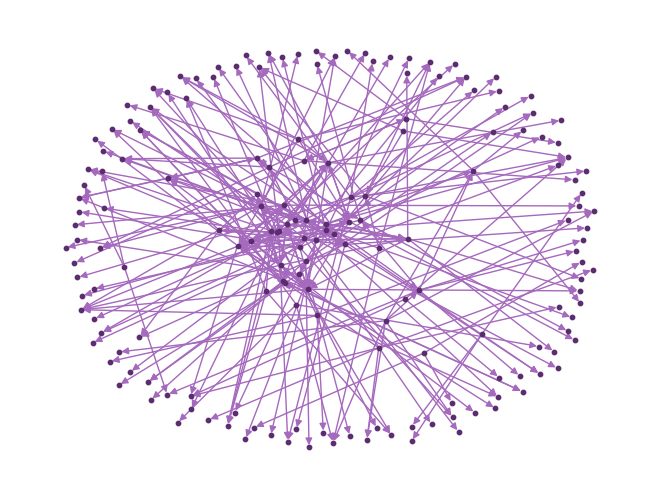

In [ ]:
g=nx.DiGraph()
g.add_nodes_from(nodes)
for listt in listfriends:
    y =listt[0]
    for x in listt:
        if x!=y:
            g.add_edge(y,x)
nx.draw(g,  node_size =10, node_color='#5B2C6F', edge_color='#A569BD')
print(len(g))
print(g.size())


a: -1.5554943634476341
b: 1.945970164114967


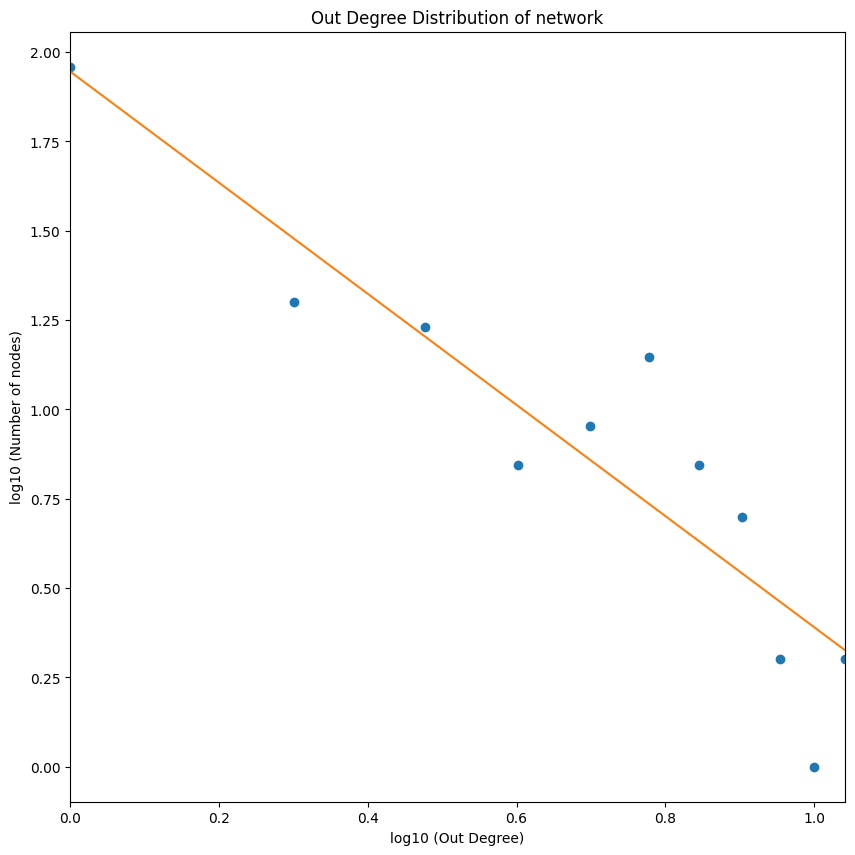

In [ ]:
out_degrees = dict(g.degree()) # dictionary node:degree
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]

import numpy as np

x = np.asarray(uq_pos_out_degree_vals, dtype = float)
y = np.asarray(out_hist, dtype = float)

logx = np.log10(x)
logy = np.log10(y)


from scipy.stats import linregress

a, b = np.polyfit(logx, logy, 1)

plt.figure(figsize=(10,10))
plt.xlim(min(logx), max(logx))
plt.xlabel('log10 (Out Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Out Degree Distribution of network')
scatter_plot = plt.plot(logx, logy, 'o')
scatter_plot_regression = plt.plot(logx, a*logx + b)

print("a: " + str(a))
print("b: " + str(b))

In [ ]:
#nx.diameter(g)
r = nx.degree_assortativity_coefficient(g)
print(r)

x = nx.average_neighbor_degree(g, source="out", target="out")
averageneighboring =[]
for i in nodes:
  averageneighboring.append(x[i])

average = sum(averageneighboring) / len(averageneighboring)
print(average)

in_center = nx.in_degree_centrality(g)
print(sum(in_center.values())/len(in_center))

out_center = nx.out_degree_centrality(g)
print(sum(out_center.values())/len(out_center))


0.2188344043206471
0.48918367346938785
0.008571428571428598
0.00857142857142857


In [ ]:
nx.directed_laplacian_matrix(g, nodelist=None, weight='weight', walk_type=None, alpha=0.95)

array([[ 9.99714286e-01, -7.66283255e-02, -1.75370944e-01, ...,
        -2.40034917e-03, -3.05717099e-04, -2.32023287e-03],
       [-7.66283255e-02,  9.94285714e-01, -7.40959489e-02, ...,
        -6.02724303e-03, -4.56089735e-03, -6.10958290e-03],
       [-1.75370944e-01, -7.40959489e-02,  9.99714286e-01, ...,
        -2.93097898e-03, -2.88673304e-04, -2.82682682e-03],
       ...,
       [-2.40034917e-03, -6.02724303e-03, -2.93097898e-03, ...,
         9.94285714e-01, -3.34194907e-03, -5.71894493e-03],
       [-3.05717099e-04, -4.56089735e-03, -2.88673304e-04, ...,
        -3.34194907e-03,  9.99714286e-01, -3.21994668e-03],
       [-2.32023287e-03, -6.10958290e-03, -2.82682682e-03, ...,
        -5.71894493e-03, -3.21994668e-03,  9.94285714e-01]])

In [ ]:
nx.is_strongly_connected(g)
nx.number_strongly_connected_components(g)
nx.number_weakly_connected_components(g)
nx.number_attracting_components(g)
nx.attracting_components(g)
nx.k_core(g, k=None, core_number=None)



a: -2.362346655635223
b: 2.100311395614275


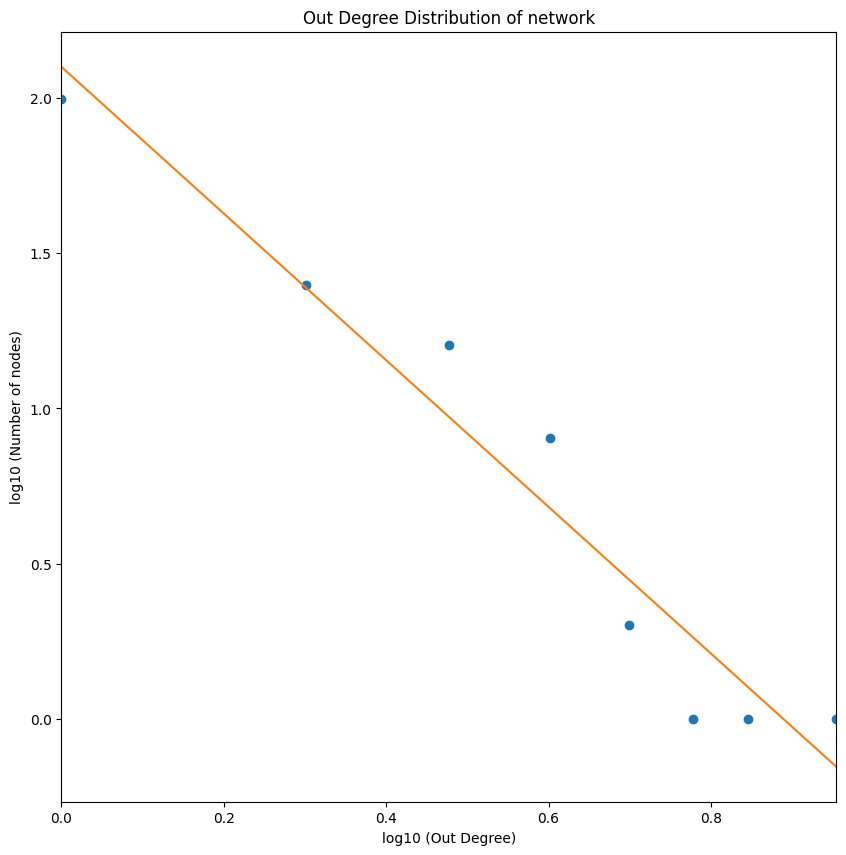

In [ ]:
out_degrees = dict(g.in_degree()) # dictionary node:degree
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]

import numpy as np

x = np.asarray(uq_pos_out_degree_vals, dtype = float)
y = np.asarray(out_hist, dtype = float)

logx = np.log10(x)
logy = np.log10(y)

from scipy.stats import linregress

a, b = np.polyfit(logx, logy, 1)

plt.figure(figsize=(10,10))
plt.xlim(min(logx), max(logx))
plt.xlabel('log10 (Out Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Out Degree Distribution of network')
scatter_plot = plt.plot(logx, logy, 'o')
scatter_plot_regression = plt.plot(logx, a*logx + b)

print("a: " + str(a))
print("b: " + str(b))

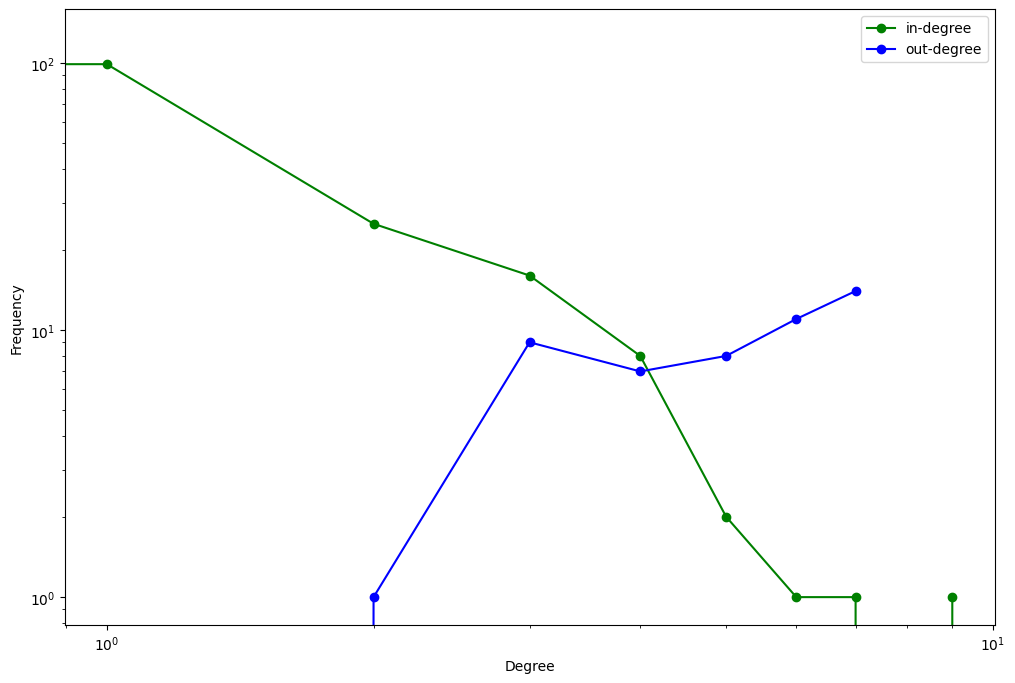

In [ ]:
def degree_histogram_directed(g, in_degree=False, out_degree=False):
    nodes = g.nodes()
    if in_degree:
        in_degree = dict(g.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(g.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq


in_degree_freq = degree_histogram_directed(g, in_degree=True)
out_degree_freq = degree_histogram_directed(g, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8))
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree')
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

168
2247


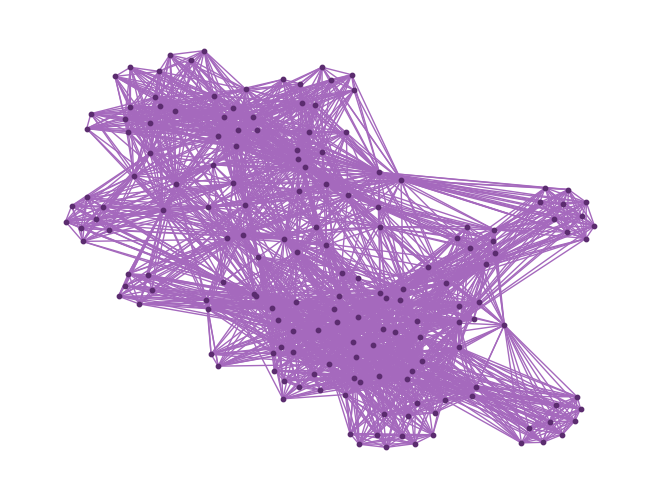

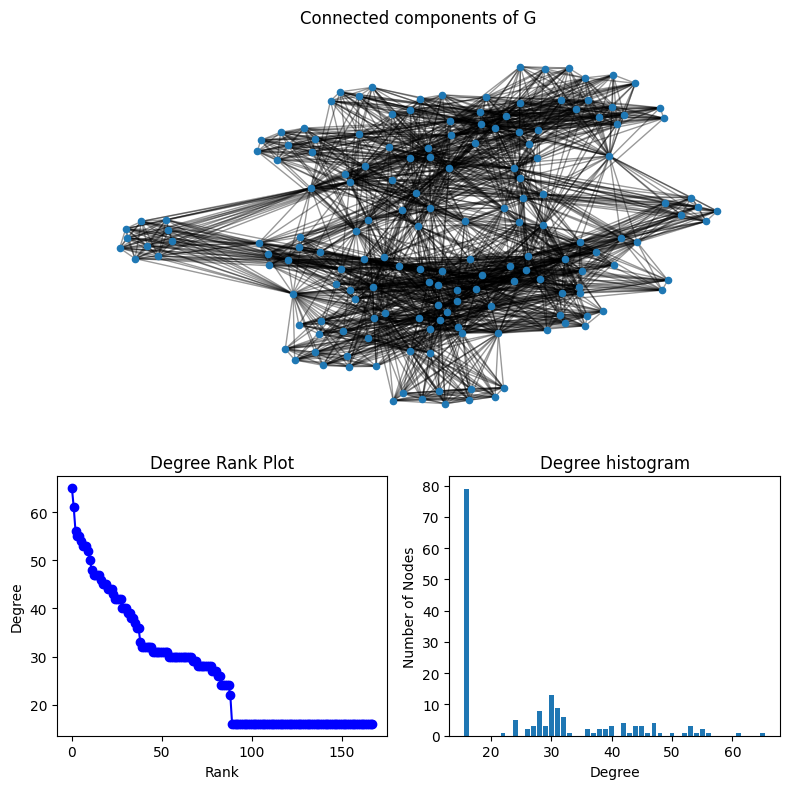

In [ ]:
import networkx as nx
import pandas as pd

df = pd.read_excel("courses.xlsx")
df1 = df.dropna()



# Creating an empty list
res=[]

# Iterating through the columns of
# dataframe
for column in df1.columns:

    # Storing the rows of a column
    # into a temporary list
    li = df1[column].tolist()

    # appending the temporary list
    res.append(li)


l=[]
for i in range(len(res)):
    shakhs=res[i]
    for j in range(len(shakhs)):
        a=shakhs[j]
        if a not in l:
            l.append(a)

g=nx.Graph()
g.add_nodes_from(l)
for listt in res:
    for y in listt:
        for x in listt:
            if x!=y:
                g.add_edge(x,y)
nx.draw(g, node_size =10, node_color='#5B2C6F', edge_color='#A569BD')
print(len(g))
print(g.size())

#degree distribution
degree_sequence = sorted((d for n, d in g.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Number of Nodes")

fig.tight_layout()
plt.show()


In [ ]:
nx.diameter(g)

3

In [ ]:
center =nx.degree_centrality(g)
print(sum(center.values())/len(center))


0.1601796407185628


In [ ]:
between = nx.betweenness_centrality(g, k=None, normalized=True, weight=None, endpoints=False, seed=None)
print(sum(between.values())/len(between))


0.006426046358230176


In [ ]:
r = nx.degree_assortativity_coefficient(g)
print(r)
communities_generator = nx.community.girvan_newman(g)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
com = sorted(map(sorted, next_level_communities))
nx.community.modularity(g, com)
print(nx.approximation.average_clustering(g, trials=1000, seed=10))

-0.045519523410095096
0.779


In [ ]:
communities_generator = nx.community.girvan_newman(g)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
com = sorted(map(sorted, next_level_communities))
nx.community.modularity(g, com)

0.3681180802014811

In [ ]:

print(nx.node_connectivity(g, s=None, t=None))

from networkx.algorithms import approximation as apxa

k_components = apxa.k_components(g)
#print(k_components)

print(nx.approximation.max_clique(g))
print(nx.approximation.maximum_independent_set(g))
print(nx.k_core(g, k=None, core_number=None))

nx.density(g)

node = 'هانیه حاتمی'
print(nx.non_neighbors(g, node))

A = nx.adjacency_matrix(g)
print(A.todense())
A.setdiag(A.diagonal() * 2)
print(A.todense())

print(nx.normalized_laplacian_matrix(g, nodelist=None, weight='weight'))

7
{'علیرضا پورحسن استانه', 'سجاد پورمنوچهری', 'فاطمه رمضانزاده', 'مهدی رسولی مهربانی', 'علیرضا حبیب زاده', 'علی اکرامیان', 'علی انصاری فر', 'عرفان رهبری', 'معین درخشان', 'هانیه حاتمی', 'پارسا زارع\u200cزاده', 'کیاوش تیموری', 'سارا اکبری خرم', 'مرتضی افراز', 'یوسف جعفری چاشمی', 'سیدپویا حسینی اسفیدواجانی', 'غزل بروایه'}
{'نیلوفر ترشراد', 'ستایش سادات طالبی', 'ایدین باقری', 'محمدیاسین امیری چیمه', 'سید پویا اسفیدواجانی', 'مونا بهروزمند', 'علی گل محمدی رامشه', 'شادی اکبری شهرستانی', 'زهرا اکبری', 'سحر حریری', 'علیرضا امیدی منش', 'علی توسلی', 'ستایش سادات حسینی'}
Graph with 76 nodes and 964 edges
<generator object non_neighbors.<locals>.<genexpr> at 0x7f7d47067290>
[[0 1 1 ... 0 0 0]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 1 1]
 [0 1 0 ... 1 0 1]
 [0 1 0 ... 1 1 0]]
[[0 1 1 ... 0 0 0]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 1 1]
 [0 1 0 ... 1 0 1]
 [0 1 0 ... 1 1 0]]
  (0, 0)	1.0
  (0, 1)	-0.033709993123162106
  (0, 2)	-0.03434014098717226
  (0, 3)	-0.0625

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
